# Project 2: Ames Housing Data 
### Notebook 01 - Data cleaning and EDA


_Author: Joe Serigano (jserigano4@gmail.com)_

---

**Objectives:**
- Clean and explore the Ames housing training data set in order to prepare these data for modeling.
- Create any new variables that might be useful for modeling.
- Create cleaned data set to be used to determine what features in a home can increase sale value.
- Create separate cleaned data set to be used for class Kaggle competition.
- Repeat cleaning process on the test data to be used for the class Kaggle competition. 

In [1]:
#Importing relevant modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import LinearRegression

In [2]:
# Reading in raw training and test data
df = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

# We are dealing with large data sets, so setting max number of column and row displays to be unlimited
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


First we will check on the shape, data types, and null values of our data sets.

In [3]:
print(f'Training data shape: {df.shape}')
print(f'Test data shape: {test.shape}')

Training data shape: (2051, 81)
Test data shape: (878, 80)


The test data set has one fewer column, as expected. This data set is missing the 'Sale Price' column, which we will have to predict and then upload our predictions to the class Kaggle site. Since we will leverage the 'Sale Price' column to handle some outliers in the training data set, we will have to clean these data sets separately. For this reason, we will first clean the training data set, then use similar methods to clean the test data set. 

In [4]:
df.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [5]:
df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


Looking at the data types and descriptive statistics of the training data set, there does not appear to be any obvious issues with these data. There are ~2000 homes in this data set and many columns with null values. We will have to modify these null values in some way in order to use these columns in our modeling procedure.

Exploring data documentation (http://jse.amstat.org/v19n3/decock/DataDocumentation.txt), most columns include null values when a home does not have a specific feature. For example, a home with no alley access will have a null value. Instead of including these null values, we will replace the NaNs with 'None' for these columns. The columns that are affected by this are included in the list below as 'nan_to_none'. 

There are also some numerical columns that include null values when the appropriate value should be 0. For example, there are 22 homes with no masonry veneer and should have a 0 in the 'Masonry veneer area in square feet' column, instead of a null value. We will fix this in the cell below. It is possible that more columns with only a couple null values are also affected by this. We will continue the cleaning process for now and come back to these null values if they are still present. 

In [7]:
nan_to_none = ['Alley', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 
       'Fence', 'Misc Feature', 'Mas Vnr Type']
df[nan_to_none] = df[nan_to_none].fillna('None')

nan_to_zero = ['Mas Vnr Area']
df[nan_to_zero] = df[nan_to_zero].fillna(0)

For certain columns it will be better to input an educated assumption about the variable instead of setting it to 0 or dropping the row all together, which would mean losing a significant chunk of the data set. These columns include 'Garage Yr Blt' and 'Lot Frontage'. 

The Garage year built column includes null values for houses that do not have a garage. Instead of inputting 0 into these columns, we will fill these null values with the year the home itself was built. This is not entirely accurate since there is no garage to begin with, but inputting the year the house was built (as opposed to 0) will lead to a better model overall. 

In [8]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])

The Lot frontage is a bit more complicated since there are no appropriate columns that we can use in its place. Additionally, there are 330 null values in this column which would be a lot of valuable data to drop. One solution would be to replace null values with the average lot frontage. However, this would not be entirely accurate and could negatively influence our model. Instead, we can attempt to find a relationship between Lot frontage and another variable and use this relationship to predict Lot frontage size for these null values. An obvious variable to compare with Lot frontage would be Lot area. Comparing these variables, we can see that these columns have a noticeable linear relationship. We can also see from this figure that using the average Lot frontage would not be appropriate for home with Lot areas on the smaller or larger end of this data set:

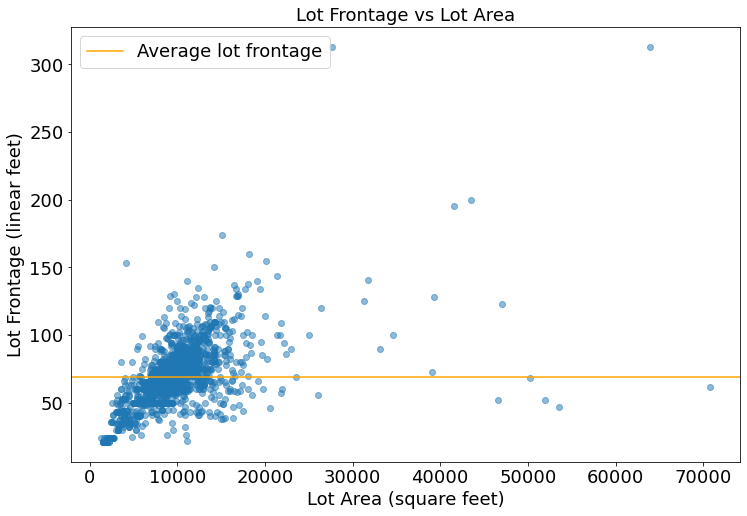

In [9]:
# Lot Frontage - we don't want to delete these rows and lose all that information. Instead we will compare to lot area, run a simple linear regression model and input these inferred values (?)
# Lot frontage follows a mostly linear trend with lot area. We will build a SLR model and use this to input the 330 NaNs.
fsize = 18
plt.figure(figsize = (12,8))
plt.scatter(df['Lot Area'], df['Lot Frontage'], alpha = 0.5)
plt.axhline(df['Lot Frontage'].mean(), color='orange',label='Average lot frontage')
plt.xlabel('Lot Area (square feet)', fontsize = fsize)
plt.ylabel('Lot Frontage (linear feet)', fontsize = fsize)
plt.title('Lot Frontage vs Lot Area',fontsize = fsize)
plt.legend(fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize);

Using the relationship between Lot frontage and Lot area, we can create a simple linear regression model and use this to predict lot frontage size for the 330 null values found in the data set.

In [10]:
# Creating a SLR model to impute values for Lot Frontage when they are NaN, using the linear relationship between Lot Frontage and Lot Area:

# Creating separate DataFrames for when Lot frontage is and is not null.
df_isnull = df[df['Lot Frontage'].isnull()]
df_nonull = df[df['Lot Frontage'].notnull()]

# Creating X and y variables for model:
X = df_nonull[['Lot Area']]
y = df_nonull['Lot Frontage']

# Instantiating and fitting our model
lr = LinearRegression()
lr.fit(X,y)

# Making Lot frontage predictions for null values based on our model
y_pred = lr.predict(df_isnull[['Lot Area']])
y_pred = [round(num, 1) for num in y_pred]

# Imputing these values into our main DataFrame
df.loc[df['Lot Frontage'].isnull(), 'Lot Frontage'] = y_pred

Let's create another figure to make sure that our model predictions for Lot frontage look realistic:

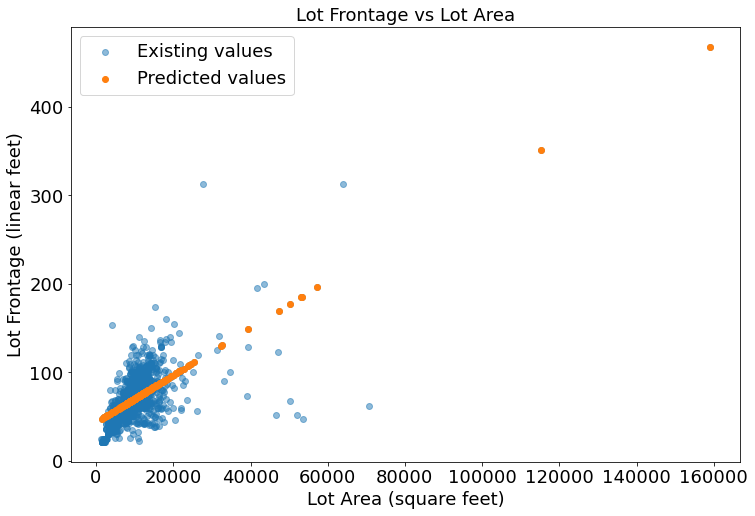

In [11]:
plt.figure(figsize = (12,8))
plt.scatter(df['Lot Area'],df['Lot Frontage'], alpha = 0.5, label = 'Existing values')
plt.scatter(df_isnull[['Lot Area']], y_pred, label = 'Predicted values')
plt.ylabel('Lot Frontage (linear feet)', fontsize = fsize)
plt.xlabel('Lot Area (square feet)', fontsize = fsize)
plt.title('Lot Frontage vs Lot Area',fontsize = fsize)
plt.legend(fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize);
#plt.xlim([0, 40000])
#plt.ylim([0, 300])
plt.savefig('figures/LFvsLA_full.png',facecolor = 'white')

Looks good! (There are definitely some outliers in the data set that will need to be dealt with at some point!)

Now, let's see what null values remain:

In [12]:
df.isnull().sum().sum()

10

We still have 10 null values. Let's print out and analyze the rows where we find these null values:

In [13]:
# Checking remaining null values:

df_null = df[df.isna().any(axis=1)]
df_null.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,None,None,None,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,None,None,None,None,NaN,None,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,None,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,4,2008,ConLD,79000
1712,2237,910201180,70,RM,50.0,9060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,None,Detchd,1923.0,None,NaN,NaN,None,None,Y,174,0,212,0,0,0,None,MnPrv,None,0,3,2007,WD,150909


There are only 3 rows left with null values and all instances should be 0, so we will simply fill them in in the next cell:

In [14]:
df = df.fillna(0)

Next, let's look for outliers in the data set. It's clear that any homes with a Lot frontage above ~250 ft should be considered outliers, so we will remove those data points. To find others, let's look at the variables with the highest correlation to Sale price and create some scatter plots.

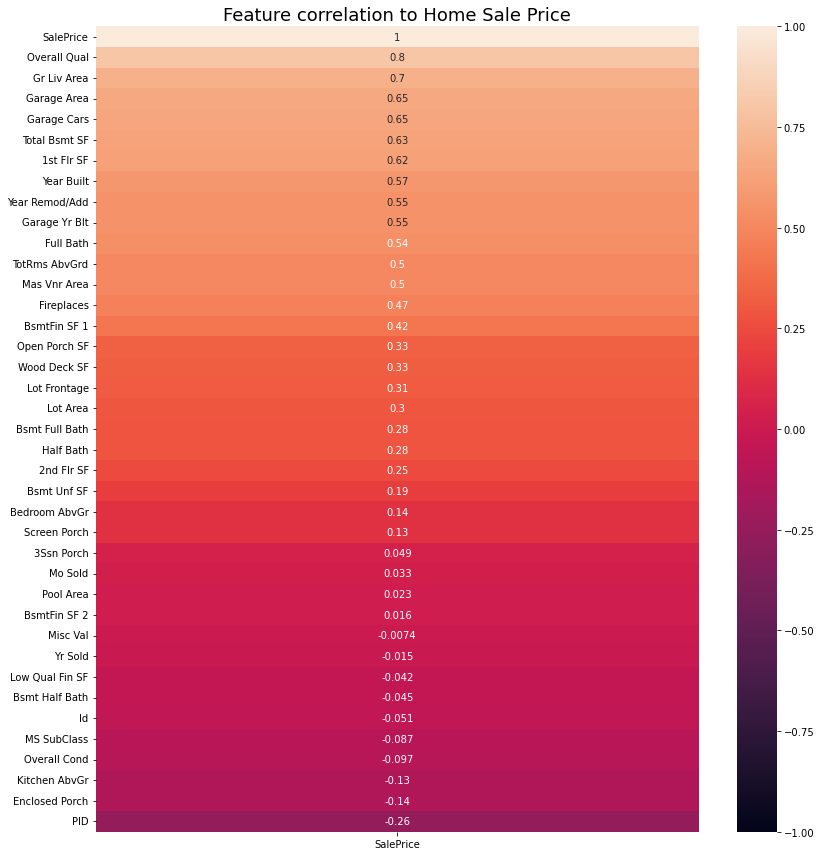

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False),
            annot = True,
            vmin = -1,
            vmax = 1);
plt.title('Feature correlation to Home Sale Price', fontsize = fsize);
plt.tight_layout();
plt.savefig('figures/corr.png',facecolor = 'white')

Let's create scatter plots of the three highest correlated variables and see if there are any notable outliers:

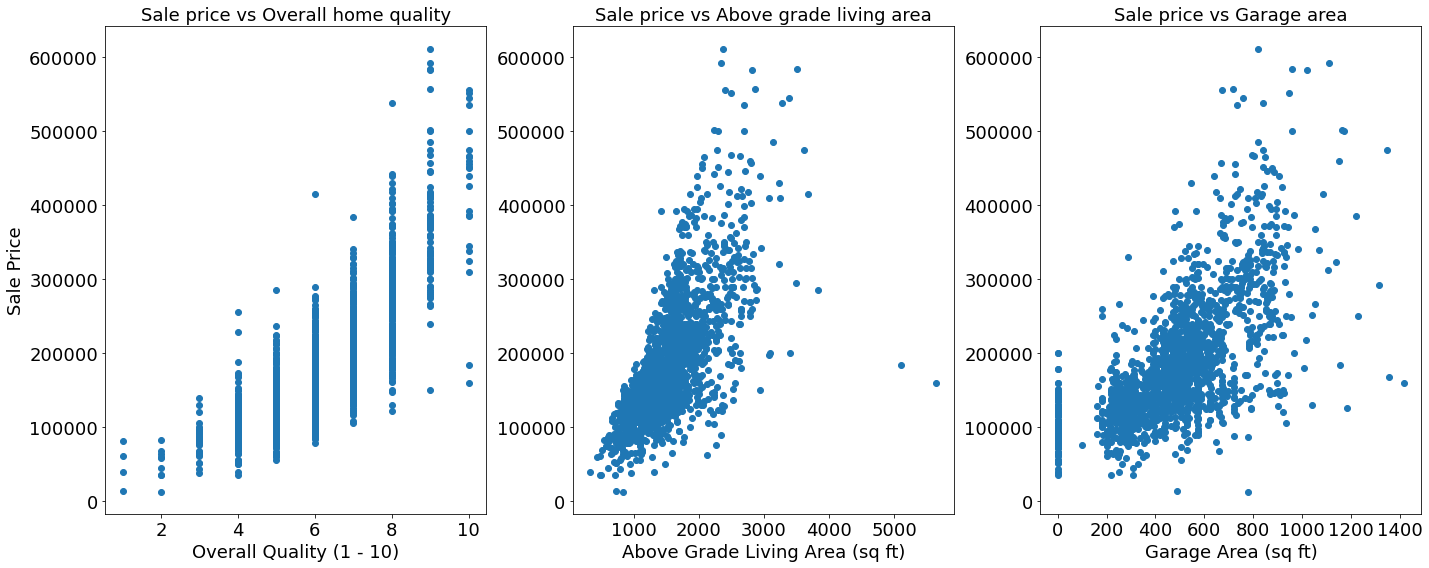

In [16]:
# Size
plt.figure(figsize = (20,8))

ax1 = plt.subplot(1, 3, 1)
ax1.scatter(df['Overall Qual'],df['SalePrice'])
ax1.set_xlabel('Overall Quality (1 - 10)',fontsize = fsize)
ax1.set_ylabel('Sale Price',fontsize = fsize);
plt.title('Sale price vs Overall home quality', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize);


ax2 = plt.subplot(1, 3, 2)
ax2.scatter(df['Gr Liv Area'],df['SalePrice'])
ax2.set_xlabel('Above Grade Living Area (sq ft)',fontsize = fsize)
plt.title('Sale price vs Above grade living area', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize);

ax3 = plt.subplot(1, 3, 3)
ax3.scatter(df['Garage Area'],df['SalePrice'])
ax3.set_xlabel('Garage Area (sq ft)',fontsize = fsize)
plt.title('Sale price vs Garage area', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize);

plt.tight_layout()

Overall quality is a discrete variable, however we can still there are some outliers at each value which we will come back to. Above grade living area has two obvious outliers around 5000 sq ft; these are homes with high square footage that have home prices that are much lower than expected. We can remove these by removing any homes with Above grade living areas greater than 4,500 square feet. The last figure of Sale price vs Garage area has no notable outliers, so we will not remove anything from here. 

Let's first remove outliers using our new constraints on Lot frontage and Above grade living area:

In [17]:
df = df[(df['Gr Liv Area'] < 4500) & (df['Lot Frontage'] < 250)]

Overall Quality is normally distributed within each discrete value. We can use the subset of data from each of these values to throw out any outliers using above a standard deviation (or zscore) of 3. For example, here is a histogram of home sale prices with an Overall quality of 5 with +/- 3* standard deviation plotted as well:

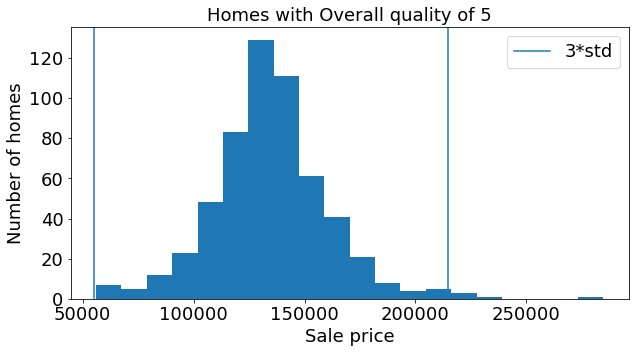

In [18]:
df5 = df[df['Overall Qual'] == 5]

plt.figure(figsize=(10,5))
plt.hist(df5['SalePrice'], bins = 20)
plt.axvline(df5['SalePrice'].mean() + 3*df5['SalePrice'].std(), label = '3*std')
plt.axvline(df5['SalePrice'].mean() - 3*df5['SalePrice'].std())
plt.xlabel('Sale price', fontsize = fsize)
plt.ylabel('Number of homes', fontsize = fsize)
plt.title('Homes with Overall quality of 5', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.legend(fontsize = fsize);

plt.savefig('figures/OQ5_histo.png',facecolor = 'white')

We can achieve this by determining the z score of homes for each subset of homes based on their overall quality score. Then, we can remove all homes in the data set with a z score above 3, which is equivalent to a home's sale price being above or below 3 standard deviations from the mean sale price for a home of that quality. We can then drop the new z score column since we will not needs this column again. 

In [19]:
# Grouping homes by their overall quality score and then determining z scores for each subset of data
# Code inspiration for this next line: https://stackoverflow.com/questions/54907933/pandas-groupby-and-calculate-z-score
df['zscore']=df.groupby(['Overall Qual'])['SalePrice'].transform(lambda x: stats.zscore(x)) 

# Removing all homes with z scores above 3 (no homes have z scores below -3)
df = df[df['zscore'] < 3]

# Dropping this new z score column since we won't need it again
df.drop(columns = ['zscore'], inplace = True)

# Determining new shape of our DataFrame
df.shape

(2032, 81)

We are done removing outliers! All together, we have removed 19 outliers in our data set.

Next up, we will create some new variables that might be useful during modeling. These include the total square footage of each home as well as the total number of full + half bathrooms.

In [20]:
# Creating new variables:

df['Total Bath'] = df['Full Bath'] + 0.5*df['Half Bath'] + df['Bsmt Full Bath'] + 0.5*df['Bsmt Half Bath']

df['Total SF'] = df['1st Flr SF'] + df['2nd Flr SF'] + df['Total Bsmt SF']

There will be two models created for this project. The goal of the first model will be to make the best prediction of home prices without worrying about interpretation of the features. The goal of the second model will be to understand how different features affect home prices, and how a family can increase their home's value through upgrading certain features. As a consequence, we will want different features for these models and will create separate cleaned data sets. We will first make a copy of the DataFrame to be used later for the second model.

In [21]:
df_2 = df.copy()

## Data for model 1: Kaggle competition

For this model we care less about interpretability of features and more about overall performance. Linear regression models operate under the assumption that the data are normally distributed. Data that are not normally distributed will lead poor model performance. Sale price, for example, is not normally distributed and has a positive skew. One way to achieve a more normal distribution is to log transform these values. You can see from the figures below that after log transformation the sale price distribution is much more normal than before.

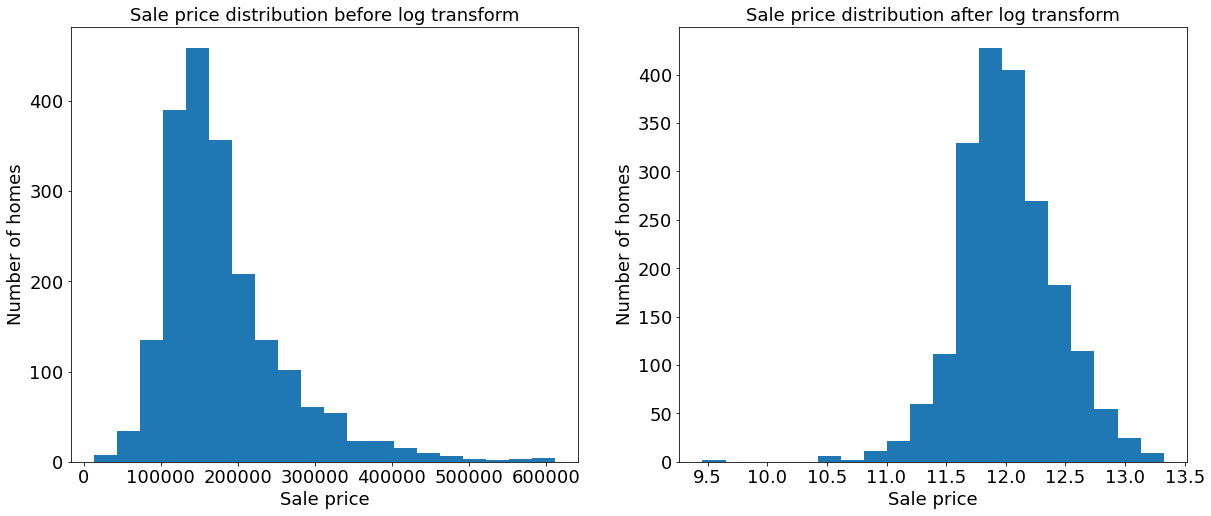

In [22]:
plt.figure(figsize = (20,8))

ax1 = plt.subplot(1, 2, 1)
ax1.hist(df['SalePrice'],bins=20)
ax1.set_xlabel('Sale price', fontsize = fsize)
ax1.set_ylabel('Number of homes', fontsize = fsize)
plt.title('Sale price distribution before log transform', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize);

ax2 = plt.subplot(1, 2, 2)
ax2.hist(np.log(df['SalePrice']),bins=20)
ax2.set_xlabel('Sale price', fontsize = fsize)
ax2.set_ylabel('Number of homes', fontsize = fsize)
plt.title('Sale price distribution after log transform', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize);

This is only something we can modify with continuous variables. We can check for other skewed data columns that might benefit from a log transformation by comparing their skew values before and after log transformation:

In [23]:
# Declare data types we'd like to check for skewness
d_types = ['int64', 'float64']

# Loop through columns and print out only columns for which the skewed value improves when performing a log transformation
for col in df:
    if df[col].dtype in d_types:
        if abs(df[col].skew()) > abs((np.log(df[col])).skew()):
            print(f'{col} | REG SKEW: {round(df[col].skew(),2)} | LOG SKEW: {round((np.log(df[col])).skew(),2)}')

PID | REG SKEW: 0.07 | LOG SKEW: 0.07
MS SubClass | REG SKEW: 1.37 | LOG SKEW: 0.25
Lot Area | REG SKEW: 3.81 | LOG SKEW: -0.88
1st Flr SF | REG SKEW: 0.85 | LOG SKEW: -0.07
Gr Liv Area | REG SKEW: 0.86 | LOG SKEW: -0.08
TotRms AbvGrd | REG SKEW: 0.77 | LOG SKEW: -0.07
Yr Sold | REG SKEW: 0.15 | LOG SKEW: 0.15
SalePrice | REG SKEW: 1.57 | LOG SKEW: -0.15
Total SF | REG SKEW: 0.67 | LOG SKEW: -0.53


/Users/jserigano4/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Of the variables listed above, we can apply a log transformation to the variables in the list that are continuous. This includes: 
- Lot area
- First floor square footage
- Above grade living area
- Sale price
- Total square footage

In [24]:
# Log transforming the variables listed above:

df['Lot Area'] = np.log(df['Lot Area'])
df['1st Flr SF'] = np.log(df['1st Flr SF'])
df['Gr Liv Area'] = np.log(df['Gr Liv Area'])
df['SalePrice'] = np.log(df['SalePrice'])
df['Total SF'] = np.log(df['Total SF'])

We are finished cleaning our training data! Now, we must apply the same cleaning procedures (aside from those that use 'Sale Price') to our test data set that will be used for the class Kaggle competition. 

In [25]:
# Cleaning test data with the same methods as above, aside from the methods that use sale price to remove outliers

test[nan_to_none] = test[nan_to_none].fillna('None')
test[nan_to_zero] = test[nan_to_zero].fillna(0)

test['Garage Yr Blt'] = test['Garage Yr Blt'].fillna(test['Year Built'])

test_isnull = test[test['Lot Frontage'].isnull()]
y_pred_test = lr.predict(test_isnull[['Lot Area']])
y_pred_test = [round(num, 1) for num in y_pred_test]
test.loc[test['Lot Frontage'].isnull(), 'Lot Frontage'] = y_pred_test

test = test.fillna(0)

test['Total Bath'] = test['Full Bath'] + 0.5*test['Half Bath'] + test['Bsmt Full Bath'] + 0.5*test['Bsmt Half Bath']
test['Total SF'] = test['1st Flr SF'] + test['2nd Flr SF'] + test['Total Bsmt SF']

# Creating test_2 to use later for model 2 data set
test_2 = test.copy()

test['Lot Area'] = np.log(test['Lot Area'])
test['1st Flr SF'] = np.log(test['1st Flr SF'])
test['Gr Liv Area'] = np.log(test['Gr Liv Area'])
test['Total SF'] = np.log(test['Total SF'])

In order to dummify these data sets in the same way we will concatenate the data sets, then dummify the variables in one place, then divide them again. To do this we must add a temporary 'SalePrice' column to the test data set and then remove it after dummifying the variables.

In [26]:
# Defining length in order to divide the data sets after dummifying
length = df.shape[0]

# Adding a zero column for sale price so that they have the same shape
test['SalePrice'] = 0

# Combining data sets
combined = pd.concat([df, test])

# Dummifying variables
combined = pd.get_dummies(combined, drop_first=True)

# Dividing data sets back to training and test sets
df = combined.iloc[:length, :]
test = combined.iloc[length:, :]

# Removing 'SalePrice' from test set
test = test.drop(columns = ['SalePrice'])

Finally, we will save our cleaned data sets to new CSV files:

In [27]:
#df.to_csv('datasets/train_cleaned.csv')
#test.to_csv('datasets/test_cleaned.csv')

## Data for model 2: Determining how different features affect home price

We will begin by creating a list of features that we would like to include in this model. These features include properties of a home that are capable of being changed and/or renovated. For example, a potential home seller would not be able to move their house to a new neighborhood but they would be able to add a new bathroom to their house. Since we would like to standardize these data, we will not log transform any variables here. 

In [28]:
model_2_features = ['Overall Qual', 'Overall Cond', 'Roof Matl', 
            'Exter Qual', 'Exter Cond', 'Bsmt Cond', 'BsmtFin Type 1', 'Heating', 'Heating QC',
            'Central Air', 'Gr Liv Area',
            'Bedroom AbvGr', 'Kitchen Qual', 'Fireplaces', 'Fireplace Qu', 'Garage Finish', 
            'Garage Area', 'Garage Qual', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
            '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Val', 'Mo Sold',
            'Total Bath', 'Total SF', 'SalePrice']

df_2 = df_2[model_2_features]
test_2 = test_2[model_2_features[:-1]]
test_2['SalePrice'] = 0

Checking for multicollinearity among model 2 features:

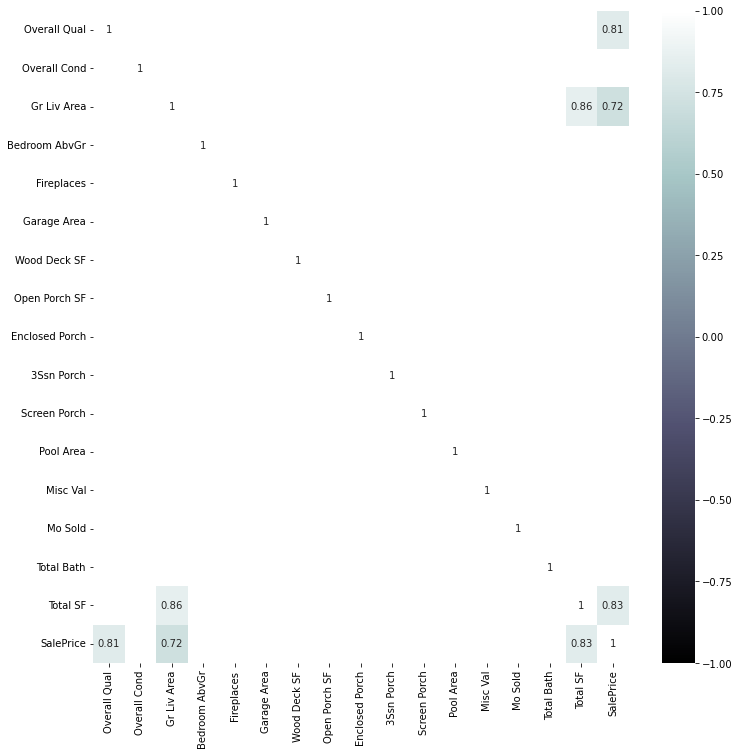

In [29]:
df2_corr = df_2.corr()

df2_corr_high = df2_corr[df2_corr >= 0.7]

plt.figure(figsize = (12,12))
sns.heatmap(df2_corr_high,
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'bone');

There correlations look okay. We will leave the features we have for now. Next we will dummify the variables, as we did before, and save the cleaned data to new CSV files.

In [30]:
# Defining length in order to divide the data sets after dummifying
length_2 = df_2.shape[0]

# Combining data sets
combined_2 = pd.concat([df_2, test_2])

# Dummifying variables
combined_2 = pd.get_dummies(combined_2, drop_first=True)

# Dividing data sets back to training and test sets
df_2 = combined_2.iloc[:length_2, :]
test_2 = combined_2.iloc[length_2:, :]

# Removing 'SalePrice' from test set
test_2 = test_2.drop(columns = ['SalePrice'])

In [31]:
df_2.to_csv('datasets/train_cleaned_2.csv')
test_2.to_csv('datasets/test_cleaned_2.csv')